# Explore here

In [2]:
pip install --upgrade numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [6]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
pip install --upgrade spotipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import spotipy as sp

In [9]:
spotipy.Spotify()

NameError: name 'spotipy' is not defined

In [ ]:
CLIENT_ID="4e7ca444ba7f46efaefc37e32aa0270f"
CLIENT_SECRET="fae82c4a4b354e78a4da9bfb480d1eed"

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [14]:
artist_id = "23fqKkggKUBHNkbKtXEls4"

response = con.artist_top_tracks("23fqKkggKUBHNkbKtXEls4")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [15]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                             name  popularity
6     3.222000                 Born To Be Yours          60
5     3.679667  It Ain’t Me (with Selena Gomez)          65
9     3.325817                    Lose Somebody          65


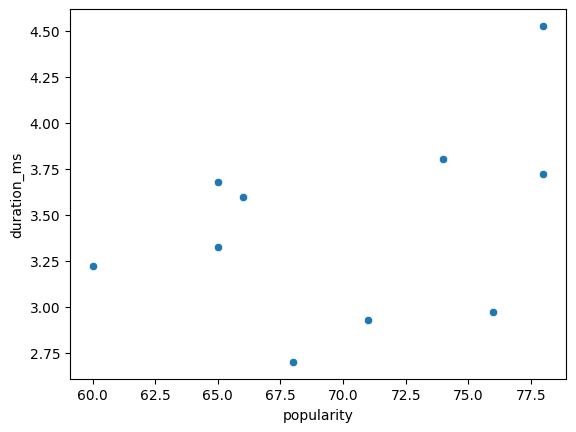

In [16]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")